<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/2026%EB%85%84__%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize-matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.1 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. 결측치 처리

In [39]:
# https://data.kma.go.kr접속 [기후통계분석] > [조건별 통계]
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4016 entries, 115 to 115
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점명            4016 non-null   object 
 1   일시             4016 non-null   object 
 2   평균풍속(m/s)      4012 non-null   float64
 3   최대풍속(m/s)      4014 non-null   float64
 4   최대풍속풍향(deg)    4015 non-null   float64
 5   	최대풍속시각        4015 non-null   object 
 6   최대순간풍속(m/s)    4014 non-null   float64
 7   최대순간풍속풍향(deg)  4015 non-null   float64
 8   	최대순간풍속시각      4015 non-null   object 
dtypes: float64(5), object(4)
memory usage: 313.8+ KB


In [50]:
# 결측치 확인
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
df_wind.isna().sum() #결측치의 개수 확인

,0
지점명,0
일시,0
평균풍속(m/s),4
최대풍속(m/s),2
최대풍속풍향(deg),1
\t최대풍속시각,1
최대순간풍속(m/s),2
최대순간풍속풍향(deg),1
\t최대순간풍속시각,1


In [52]:
#평균풍속 결측치 데이터 확인
df_wind[df_wind["평균풍속(m/s)"].isna()]

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2015-03-22,NaN,11.6,340.0,06:38,19.1,340.0,06:29
115,울릉도,2015-04-01,NaN,12.1,50.0,10:27,20.9,70.0,10:22
115,울릉도,2019-04-18,NaN,11.7,230.0,22:50,16.5,200.0,12:18
115,울릉도,2025-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#데이터 통계 확인
df_wind.describe()

,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg)
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,3.887886,7.828331,168.250470,13.205049,172.004952
std,1.836362,3.013254,104.421911,5.098674,103.899165
min,0.700000,1.900000,3.887886,3.500000,3.887886
25%,2.500000,5.500000,50.000000,9.300000,50.000000
50%,3.500000,7.500000,230.000000,12.800000,200.000000
75%,4.900000,9.700000,250.000000,16.700000,250.000000
max,14.900000,26.000000,360.000000,43.400000,360.000000


In [53]:
#결측치 처리 1
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)

# 결측값(NaN)을 0으로 채움
df_wind.fillna(0, inplace=True)
# 평균풍속(m/s)이 0인 행을 선택하여 출력
df_wind[df_wind['평균풍속(m/s)'] == 0.0]

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2015-03-22,0.0,11.6,340.0,06:38,19.1,340.0,06:29
115,울릉도,2015-04-01,0.0,12.1,50.0,10:27,20.9,70.0,10:22
115,울릉도,2019-04-18,0.0,11.7,230.0,22:50,16.5,200.0,12:18
115,울릉도,2025-12-27,0.0,0.0,0.0,0,0.0,0.0,0


In [54]:
#결측치 처리 2
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
# 평균풍속(m/s)이 0인 행을 선택하여 출력
df_wind[df_wind['평균풍속(m/s)'] == 0.0]
# '평균풍속(m/s)' 열의 평균값으로 결측값(NaN)을 채움
# inplace=True로 설정하여 원본 DataFrame에서 직접 수정
df_wind.fillna(df_wind['평균풍속(m/s)'].mean(), inplace=True)

# '일시' 열이 '2019-04-18'인 행을 선택하여 출력
df_wind[df_wind['일시'] == '2019-04-18']


,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2019-04-18,3.887886,11.7,230.0,22:50,16.5,200.0,12:18


In [55]:
#결측치 삭제
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
# 결측값(NaN)이 포함된 행을 모두 삭제
# axis=0은 행(row) 단위로 동작함을 의미하며,
# how="any"는 하나라도 결측값이 있는 행을 삭제하는 설정
# inplace=True는 원본 DataFrame에서 바로 수정이 이루어지도록 함
df_wind.dropna(axis=0, how="any", inplace=True)
df_wind[ df_wind['일시'] =='2019-04-18']


,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,


# 데이터 이상치 처리

In [91]:
# 캐글에서 Korea's Apple로 검색  https://www.kaggle.com/datasets/chochochosam/analysis-of-koreas-apples
import pandas as pd
df_Hongro = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/Hongro.csv')
df_Fuji.head()

,지역,수확일자,과중(g),종경(mm),횡경(mm),L/D 비율,경도1,경도2,경도평균,당도(˚Brix),산도(%),착색(Hunter L),착색(Hunter a),착색(Hunter b)
0,포천,2022-09-07,268.0,79.9,86.3,0.92,40.5,39.0,39.8,14.1,0.21,39.1,28.7,14.6
1,화성,2022-09-02,358.3,92.8,94.5,0.98,36.4,38.2,37.3,12.5,0.24,54.1,14.4,20.1
2,완주,2022-09-02,258.9,78.0,83.2,0.94,38.2,37.6,37.9,13.4,0.26,58.3,10.0,21.3
3,완주2,2022-09-01,291.1,79.3,87.1,0.91,38.9,37.8,38.4,13.4,0.25,58.3,9.4,20.1
4,군위,2021-08-26,265.5,78.9,85.4,0.92,55.8,56.1,56.0,13.4,0.22,53.2,16.6,19.5


In [96]:
df_Hongro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            50 non-null     object 
 1   수확일자          50 non-null     object 
 2   과중(g)         50 non-null     float64
 3   종경(mm)        50 non-null     float64
 4   횡경(mm)        50 non-null     float64
 5   L/D 비율        50 non-null     float64
 6   경도1           50 non-null     float64
 7   경도2           50 non-null     float64
 8   경도평균          50 non-null     float64
 9   당도(˚Brix)     50 non-null     float64
 10  산도(%)         50 non-null     float64
 11  착색(Hunter L)  50 non-null     float64
 12  착색(Hunter a)  50 non-null     float64
 13  착색(Hunter b)  50 non-null     float64
dtypes: float64(12), object(2)
memory usage: 5.6+ KB


In [97]:
# 통계값 확인
df_Hongro.describe()

,과중(g),종경(mm),횡경(mm),L/D 비율,경도1,경도2,경도평균,당도(˚Brix),산도(%),착색(Hunter L),착색(Hunter a),착색(Hunter b)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,278.200000,78.766000,85.038000,0.908800,44.796000,44.394000,44.594000,13.762000,0.245600,54.394000,18.584000,22.29000
std,57.931194,13.422759,13.675733,0.136182,12.148233,11.829286,11.867765,1.154917,0.057611,6.183302,7.201257,4.80804
min,134.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,39.100000,3.100000,14.60000
25%,248.650000,76.025000,83.650000,0.902500,37.300000,37.625000,37.450000,13.225000,0.212500,51.175000,14.800000,18.90000
50%,270.650000,79.650000,86.500000,0.920000,40.600000,40.150000,40.350000,13.800000,0.240000,54.400000,18.550000,20.95000
75%,303.100000,83.600000,90.350000,0.950000,56.650000,56.450000,56.650000,14.575000,0.280000,58.200000,23.600000,26.52500
max,454.200000,99.800000,103.600000,1.040000,66.500000,63.300000,62.900000,16.100000,0.370000,70.400000,36.000000,34.20000


In [98]:
df_Hongro.columns

Index(['지역', '수확일자', '과중(g)', '종경(mm)', '횡경(mm)', 'L/D 비율', '경도1', '경도2',
       '경도평균', '당도(˚Brix)', '산도(%)', '착색(Hunter L)', '착색(Hunter a)',
       '착색(Hunter b)'],
      dtype='object')

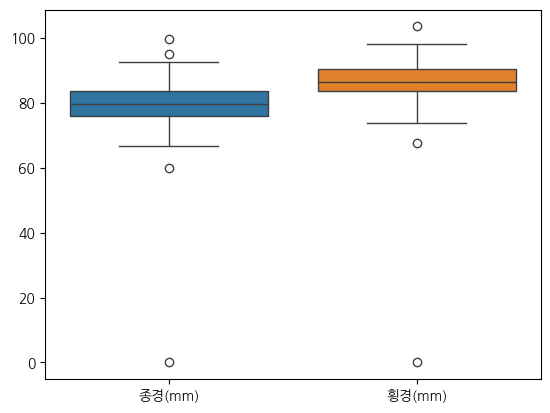

In [103]:
#박스플롯으로 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df_Hongro[[  '종경(mm)', '횡경(mm)']] )
plt.show()

#데이터 정규화

In [105]:
import pandas as pd
df_heavymetal = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/heavymetal.csv',encoding='cp949')
df_heavymetal.head()

,연월,납(마이크로그램 퍼 세제곱미터),카드뮴(마이크로그램 퍼 세제곱미터),크롬(마이크로그램 퍼 세제곱미터),구리(마이크로그램 퍼 세제곱미터),망간(마이크로그램 퍼 세제곱미터),철(마이크로그램 퍼 세제곱미터),니켈(마이크로그램 퍼 세제곱미터),비소(마이크로그램 퍼 세제곱미터),베릴륨(마이크로그램 퍼 세제곱미터),알루미늄(마이크로그램 퍼 세제곱미터),칼슘(마이크로그램 퍼 세제곱미터),마그네슘(마이크로그램 퍼 세제곱미터)
0,2025-01-01,0.09149,0.00469,0.00263,0.02657,0.03747,0.52214,0.00665,0.01476,0,0.15720,0.45158,0.11938
1,2025-02-01,0.07537,0.00636,0.00135,0.01684,0.02285,0.27262,0.00294,0.03289,0,0.07042,0.20955,0.07750
2,2025-03-01,0.04610,0.00195,0.00266,0.01513,0.03403,0.58333,0.00862,0.00873,0,0.23108,0.70332,0.18003
3,2025-04-01,0.05360,0.00484,0.00247,0.02526,0.04653,0.74231,0.00443,0.01317,0,0.29929,0.77904,0.36815
4,2025-05-01,0.03667,0.00176,0.00243,0.02064,0.03679,0.49613,0.00423,0.00495,0,0.20874,0.45046,0.18034


In [106]:
df_heavymetal.describe()

,납(마이크로그램 퍼 세제곱미터),카드뮴(마이크로그램 퍼 세제곱미터),크롬(마이크로그램 퍼 세제곱미터),구리(마이크로그램 퍼 세제곱미터),망간(마이크로그램 퍼 세제곱미터),철(마이크로그램 퍼 세제곱미터),니켈(마이크로그램 퍼 세제곱미터),비소(마이크로그램 퍼 세제곱미터),베릴륨(마이크로그램 퍼 세제곱미터),알루미늄(마이크로그램 퍼 세제곱미터),칼슘(마이크로그램 퍼 세제곱미터),마그네슘(마이크로그램 퍼 세제곱미터)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000
mean,0.078455,0.004550,0.002355,0.024503,0.040545,0.563292,0.005589,0.017866,0.0,0.184180,0.486580,0.167209
std,0.034654,0.002204,0.001059,0.007674,0.015599,0.187481,0.002305,0.009518,0.0,0.094823,0.197605,0.079251
min,0.036670,0.001760,0.000050,0.014880,0.013640,0.272620,0.001370,0.004950,0.0,0.067670,0.209550,0.077500
25%,0.052525,0.003115,0.002027,0.019690,0.034120,0.463048,0.004380,0.012475,0.0,0.103325,0.323238,0.116553
50%,0.070375,0.004105,0.002450,0.024755,0.037130,0.522815,0.005650,0.013965,0.0,0.182970,0.451020,0.156415
75%,0.097525,0.005220,0.002638,0.027465,0.049010,0.668795,0.006727,0.027463,0.0,0.251455,0.660018,0.185982
max,0.153300,0.008570,0.004240,0.041170,0.067450,0.927460,0.009730,0.032890,0.0,0.332930,0.779040,0.368150


In [116]:
#칼럼명 변경
df_heavymetal.columns = ['연월', '납', '카드뮴', '크롬', '구리', '망간', '철', '니켈', '비소', '베릴륨', '알루미늄', '칼슘', '마그네슘']


In [117]:
# 칼럼 확인
df_heavymetal.columns

Index(['연월', '납', '카드뮴', '크롬', '구리', '망간', '철', '니켈', '비소', '베릴륨', '알루미늄',
       '칼슘', '마그네슘'],
      dtype='object')

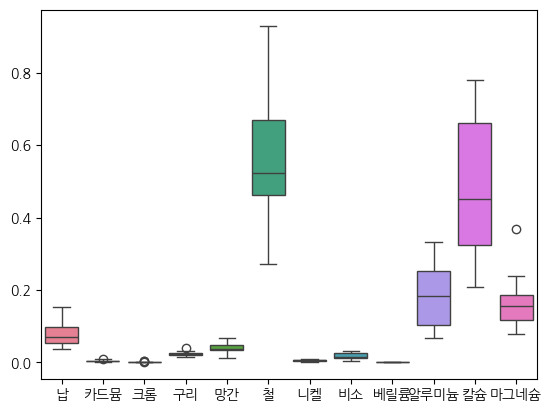

In [120]:
columns=['납', '카드뮴', '크롬', '구리', '망간', '철', '니켈', '비소', '베릴륨', '알루미늄',
       '칼슘', '마그네슘']
sns.boxplot(data=df_heavymetal[columns] )
plt.show()

In [124]:
from sklearn.preprocessing import MinMaxScaler
# 최소-최대 정규화 (Min-Max Scaling) 수행
# 데이터를 0과 1 사이의 값으로 변환합니다.
scaler = MinMaxScaler()
# 선택된 컬럼에 Min-Max Scaling 적용
df_normalized = df_heavymetal.copy() # 원본 데이터프레임 복사
df_normalized[columns] = scaler.fit_transform(df_heavymetal[columns])

df_normalized.describe()

,납,카드뮴,크롬,구리,망간,철,니켈,비소,베릴륨,알루미늄,칼슘,마그네슘
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000
mean,0.358270,0.409692,0.550119,0.366045,0.500000,0.443882,0.504685,0.462270,0.0,0.439229,0.486453,0.308650
std,0.297131,0.323674,0.252833,0.291891,0.289895,0.286300,0.275769,0.340657,0.0,0.357471,0.346985,0.272669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.135943,0.198972,0.471957,0.182959,0.380598,0.290800,0.360048,0.269327,0.0,0.134415,0.199630,0.134363
50%,0.288991,0.344347,0.572792,0.375618,0.436536,0.382070,0.511962,0.322656,0.0,0.434668,0.424011,0.271512
75%,0.521778,0.508076,0.617542,0.478699,0.657313,0.604995,0.640849,0.805744,0.0,0.692849,0.791002,0.373241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<Axes: >

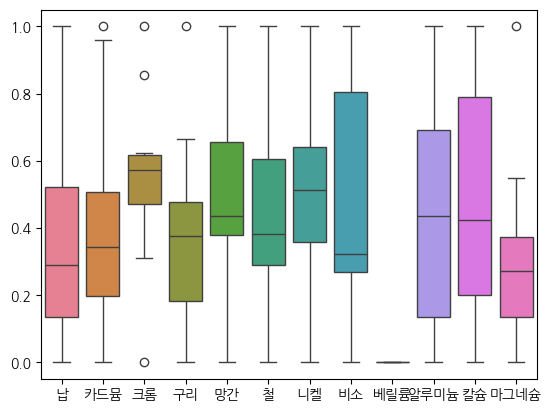

In [125]:
#정규화 된 데이터 확인
sns.boxplot(data=df_normalized)